
# Support Vector Machines


## Atherosclerotic Heart Disease¶


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, preprocessing
from sklearn.preprocessing import scale
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
heart = pd.read_csv('../data/Heart.csv')
heart.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
def yes_no(s):
    if s == "Yes":
        return 1
    elif s == "No":
        return 0

heart.AHD.apply(yes_no).head()

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [4]:
heart['ahd_num'] = heart.AHD.apply(yes_no)

In [5]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0


In [6]:
#creates a subplot...colored background

def plot_svm(i, clf, title, X, y, col1, col2):
    
    h = .2  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
    y_min, y_max = X[col2].min() - 1, X[col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_stack = np.stack([xx.flatten(), yy.flatten()]).T

    x1 = X[col1]
    x2 = X[col2]
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(scale(grid_stack)).reshape(xx.shape)
    # Put the result into a color plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    x_s = preprocessing.scale(X)

    # Plot also the training points
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

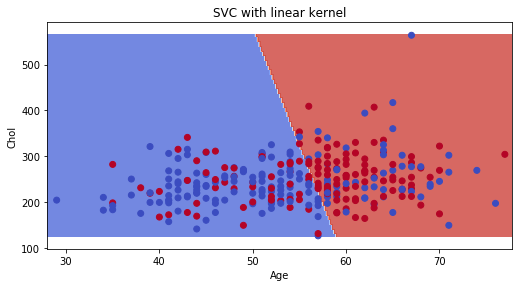

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

col1, col2 = 'Age', 'Chol'

X = heart[[col1, col2]]                    
y = heart['ahd_num']
# create a model to predict if a patient has AHD.
# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors

svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
# model = fitting

plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)


plt.show()

#red = AHD, blue = no AHD. Model draws a separating line between the data that fits the data best. Its colored according to the blue/ red..see how more red dots are in the red block?

In [8]:
svc.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [9]:
svc.score(X,y)

0.45874587458745875

In [10]:
C=1.0
X_scaled = preprocessing.scale(X)

In [11]:
# this creates a classifier. linear kernel.
svc = svm.SVC(kernel='linear', C=1.0).fit(X_scaled, y)

In [12]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)

In [13]:
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)

In [14]:
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

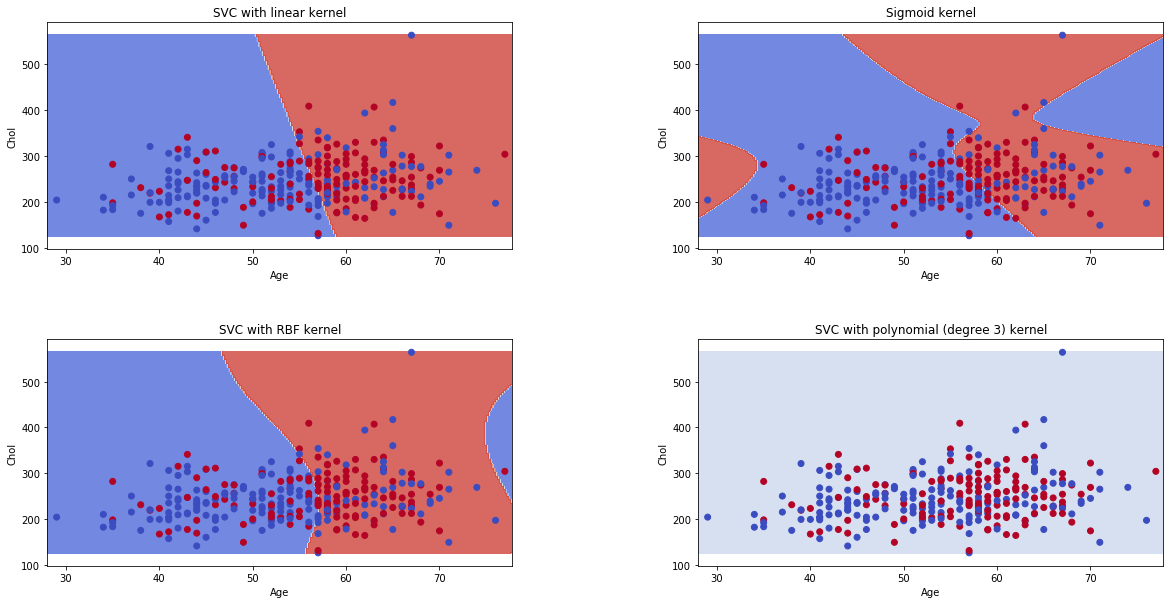

In [15]:
# title for the plots
titles = ['SVC with linear kernel',
          'Sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, sig_svc, rbf_svc, poly_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()


In [16]:
svc.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [17]:
svc.score(X,y)

0.45874587458745875


# Assignment

## 1. Convert all columns into new numerical feature columns

In [18]:
# Convert text Chest Pain into numerical feature

def chestpain_type(s):
    if s == "typical":
        return 0
    if s == "nontypical":
        return 1
    if s == "asymptomatic":
        return 2
    if s == "nonanginal":
        return 3

heart.ChestPain.apply(chestpain_type).head()

0    0
1    2
2    2
3    3
4    1
Name: ChestPain, dtype: int64

In [19]:
#add in column for numerical Chest Pain Type

heart['ChestPain_Type'] = heart.ChestPain.apply(chestpain_type)
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num,ChestPain_Type
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,2
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,2
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,3
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,1


In [20]:
# Convert text Thal into numerical feature

def Thal_type(s):
    if s == "normal":
        return 0
    elif s == "NA":
        return 1
    elif s == "fixed":
        return 2
    elif s == "reversable":
        return 3
   
heart.Thal.apply(Thal_type).head()

#add in column for numerical Thal Type

heart['Thal_Type'] = heart.Thal.apply(Thal_type)
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ahd_num,ChestPain_Type,Thal_Type
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,0,2.0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,2,0.0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,2,3.0
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,3,0.0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,1,0.0


## 2. Using all numerical columns:

### a) fit a model and plot the resulting predictions.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [22]:
#creates a subplot...colored background

def plot_svm(i, clf, title, X, y, col1, col2):
    
    h = .2  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[col1].min() - 1, X[col1].max() + 1
    y_min, y_max = X[col2].min() - 1, X[col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_stack = np.stack([xx.flatten(), yy.flatten()]).T

    x1 = X[col1]
    x2 = X[col2]
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(scale(grid_stack)).reshape(xx.shape)
    # Put the result into a color plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    x_s = preprocessing.scale(X)

    # Plot also the training points
    plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)

### Models using Age and Sex as predictors for having AHD

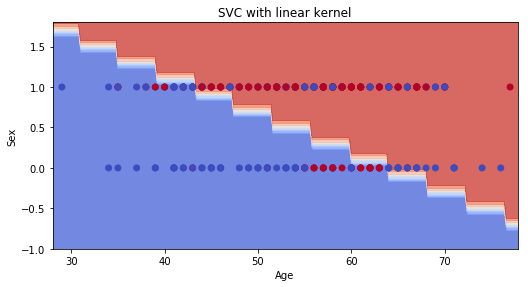

In [23]:
#Linear model with Age and Sex as predictors for having AHD. Blue = AHD false RED = AHD True
col1, col2 =  'Age', 'Sex'

X = heart[[col1, col2]]                    
y = heart['ahd_num']


svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)


plot_svm(0, svc,'SVC with linear kernel' , X, y, col1, col2)


plt.show()

Observation: in this model, it appears that one of the sexes (male or female) is more likely to have AHD than the other, especially as they age.

In [24]:
C=1.0
X_scaled = preprocessing.scale(X)

In [25]:
#Various models with Age and Sex as predictors for having AHD. Blue = AHD false RED = AHD True
col1, col2 =  'Age', 'Sex'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

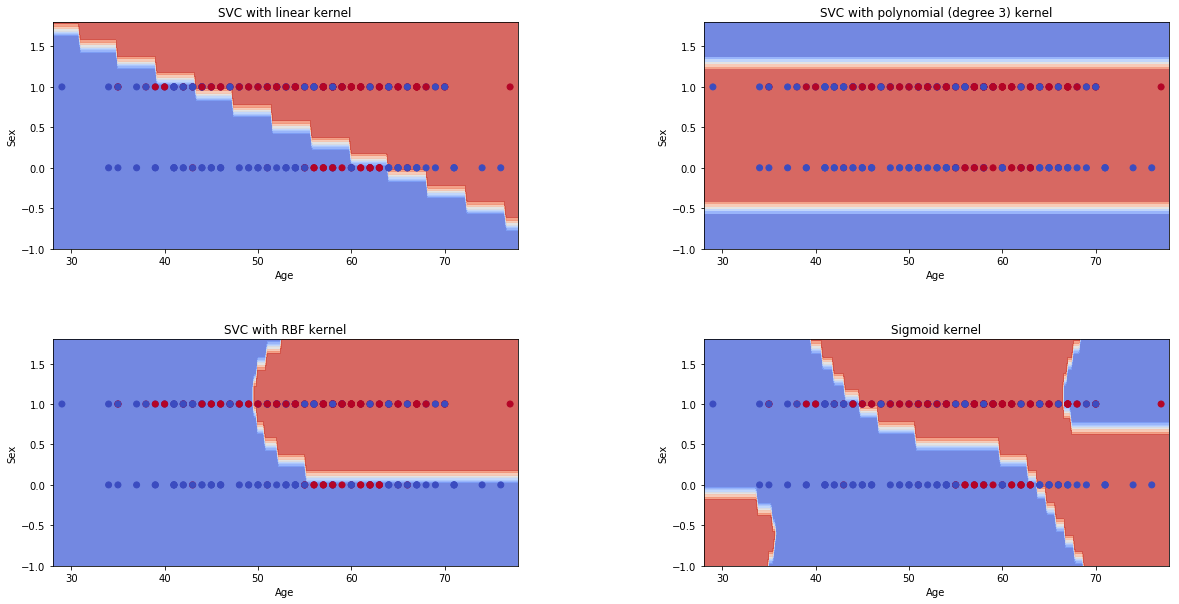

In [26]:
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel',
          'Sigmoid kernel']


for i, clf in enumerate((svc, poly_svc, rbf_svc, sig_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()

Observation: Even in the various models, AHD does seem to favor one sex over the other. Likely indicative that one sex has a higher probability of having AHD than the other, especially as they age. 

### Another model using Age and RestBP

In [27]:
col1, col2 =  'Age', 'RestBP'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

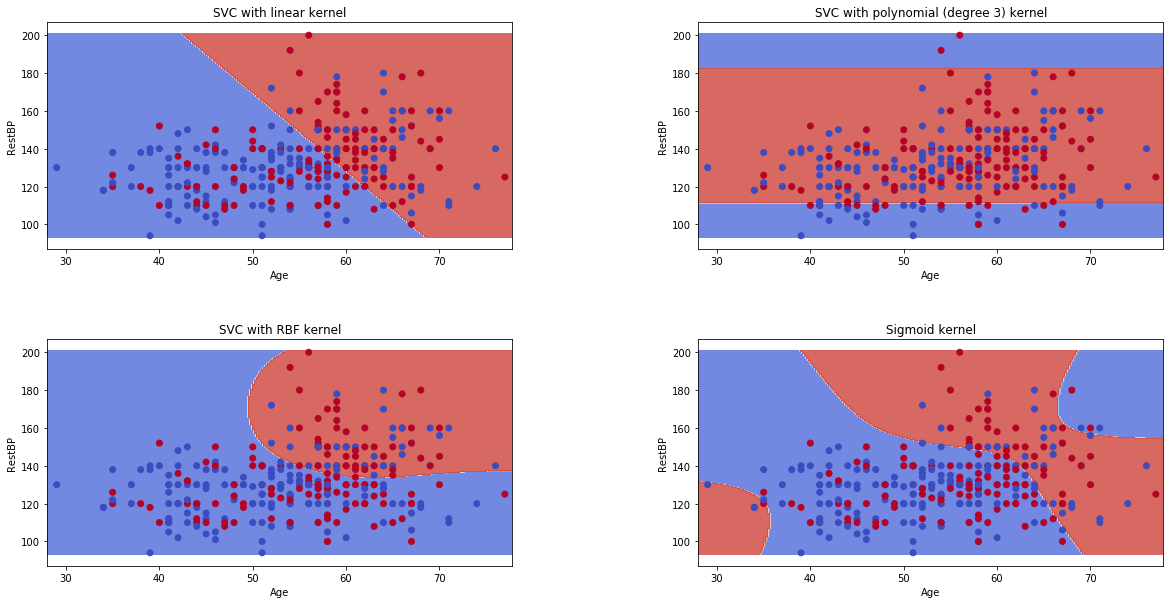

In [28]:
#Blue = AHD false RED = AHD True
svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel',
          'Sigmoid kernel']


for i, clf in enumerate((svc, poly_svc, rbf_svc, sig_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()

Observation: in this model, it appears that these aren't great predictors of having AHD, as in any Age and RestBP results they could or could not have AHD (especially when you're looking at the various kernels).

### One last model using Age and Chest Pain

In [29]:
col1, col2 =  'Age', 'ChestPain_Type'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

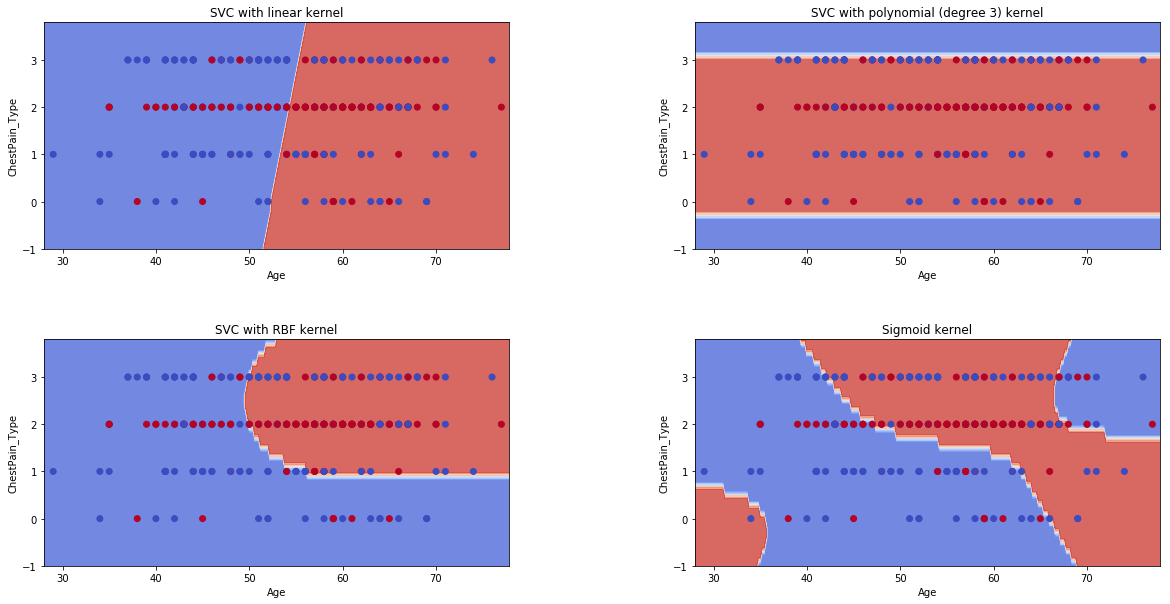

In [30]:
#Blue = AHD false RED = AHD True
svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X_scaled, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel',
          'Sigmoid kernel']


for i, clf in enumerate((svc, poly_svc, rbf_svc, sig_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()

Observation: in this model, it's really hard to tell the results. It appears that chest pain type appears at all ages, as well as the probability to have AHD. This shows that this pairing of variables (Age and ChestPain Type) aren't diagnostic enough to predict AHD.

### b) count the number of correct Yes prediction and No prediction along with the number of Wrong Yes/No and store them into a dictionary (see Confusion Matrix for more details).

#### Note: Using the linear model with Age and Resting Blood Pressure as predictive features for AHD. 

In [31]:
import itertools

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets, metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

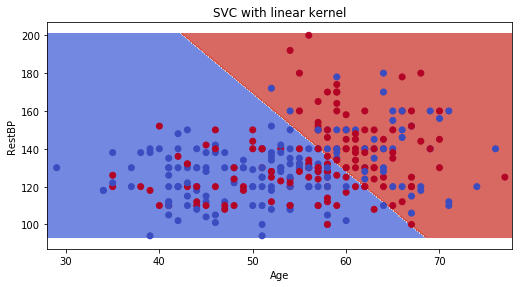

In [32]:
#Linear model Blue = AHD false, RED = AHD True
col1, col2 =  'Age', 'RestBP'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

# this creates a classifier. linear kernel.
svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)


plot_svm(0, svc,'SVC with linear kernel', X, y, col1, col2)


plt.show()

In [33]:
svc.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [34]:
svc.score(X,y, sample_weight=None)

0.45874587458745875

Observation: The mean accuracy of X (Age and RestBP) predicting if a patient had AHD is about 46%

###  Confusion matrix 

##### (note: I was not too clear on how to approach this, I looked up various documentation on scikit-learn, followed an example. does not appear that the plots worked out well; however, the matrix did appear ok)

In [35]:
X = heart[[col1, col2]]                    
y = heart['ahd_num']
AHD_presence = heart.ahd_num

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
classifier = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

Note: Used scikit-learn 0.15 documentation for confusion matrix plot. (See: http://scikit-learn.org/0.15/auto_examples/plot_confusion_matrix.html)

[[26 14]
 [17 19]]


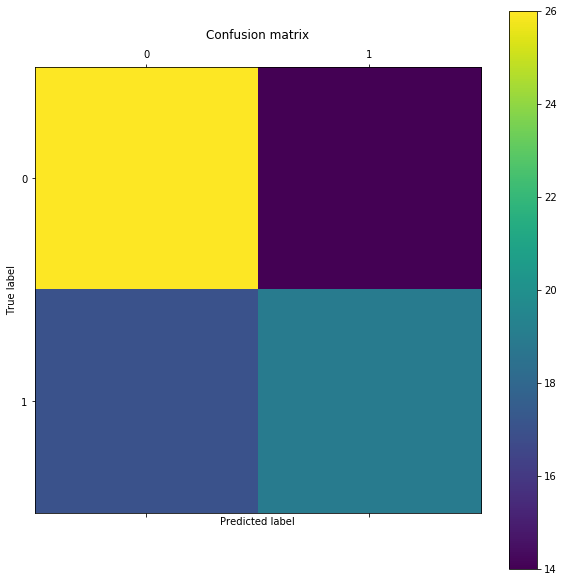

In [38]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
results = dict ()

In [41]:
results['Linear Model for Age and RestBP'] = [26,14,17,19]

In [59]:
results_array = []
results_array.append({"Type":"Linear", "True Positive":26, "False Negative":14, "False Positive": 17, "True Negative": 19})


In [60]:
print (results_array)


[{'Type': 'Linear', 'True Positive': 26, 'False Negative': 14, 'False Positive': 17, 'True Negative': 19}]


### c) repeat this (build a model?) for all the possible Kernels and vary your polynomial degrees

##### Model using Age and Resting Blood Pressure Reading, with varied polynomial degree from the original run earlier (note: only repeated building models for all possible kernels and varied polynomial degrees. Did not redo confusion matrix (did not appear to work wth non-linear kernels).

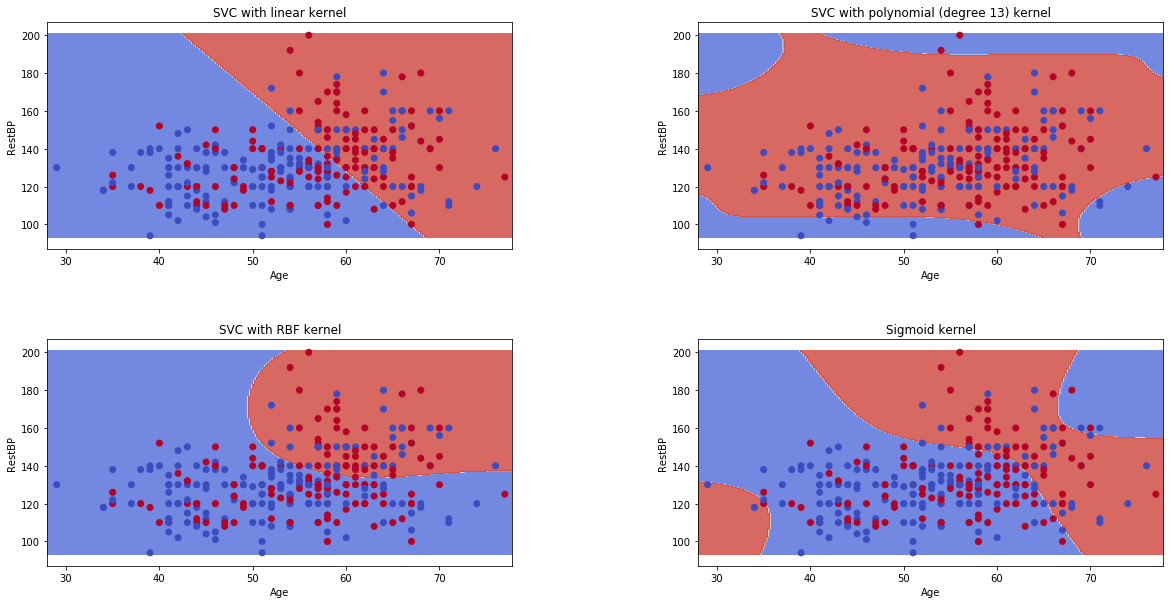

In [44]:
col1, col2 =  'Age', 'RestBP'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

#Blue = AHD false RED = AHD True
svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
poly_svc = svm.SVC(kernel='poly', degree=12, C=C).fit(X_scaled, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 13) kernel',
          'SVC with RBF kernel',
          'Sigmoid kernel']


for i, clf in enumerate((svc, poly_svc, rbf_svc, sig_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()

#### With another varied  polynomial degree

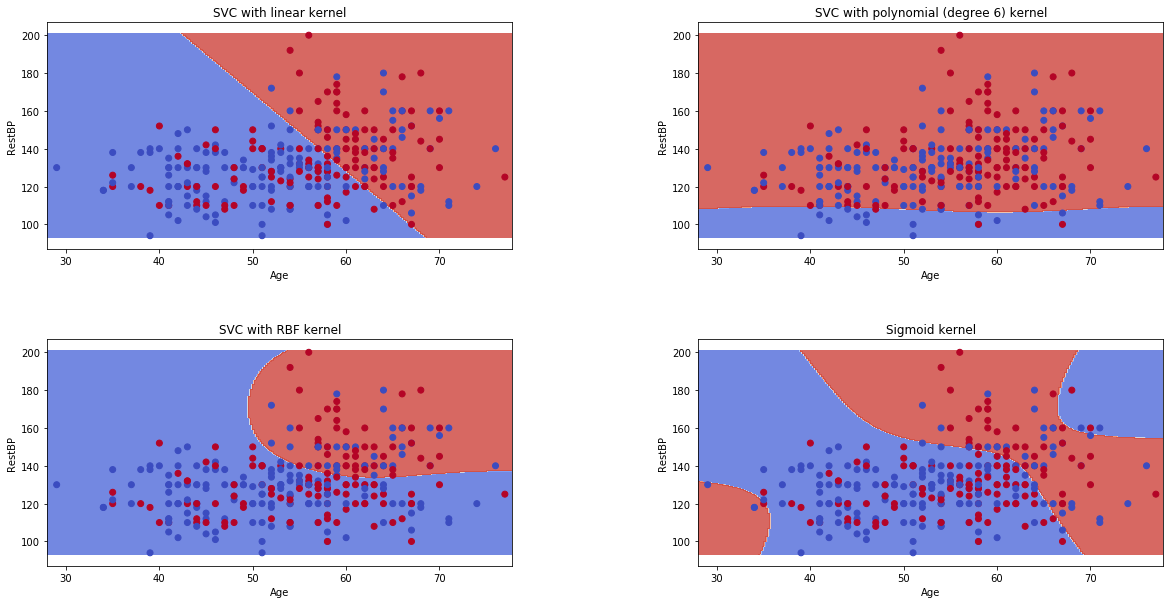

In [45]:
col1, col2 =  'Age', 'RestBP'

X = heart[[col1, col2]]                    
y = heart['ahd_num']

#Blue = AHD false RED = AHD True
svc = svm.SVC(kernel='linear', C=1.0).fit(scale(X), y)
poly_svc = svm.SVC(kernel='poly', degree=5, C=C).fit(X_scaled, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_scaled, y)
sig_svc = svm.SVC(kernel='sigmoid', C=C).fit(X_scaled, y)

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 6) kernel',
          'SVC with RBF kernel',
          'Sigmoid kernel']


for i, clf in enumerate((svc, poly_svc, rbf_svc, sig_svc)):
    plot_svm(i, clf, titles[i], X, y, col1, col2)

plt.show()

## 3. Using the dictionary into a pandas DataFrame, display the results

#### Displaying results from the Linear model using Age and RestBP.

In [61]:
pd.DataFrame(results_array)


,False Negative,False Positive,True Negative,True Positive,Type
0,14,17,19,26,Linear



## 4. Repeat this process with a 65/35 Train/Test Split and using the Test Set for your prediction metrics¶

#### Using linear model for Age and RestBP as predictors for AHD.

In [73]:
col1, col2 =  'Age', 'RestBP'

X = heart[[col1, col2]]                    
y = heart['ahd_num']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([ 0.01,  0.  ]), -0.55495318352885459)

In [75]:
model = LinearRegression()
model.fit(X_test, y_test)
model.coef_, model.intercept_

(array([ 0.01,  0.  ]), -0.39996131463185064)

In [76]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, np.dot(X_train, model.coef_) + model.intercept_)

0.23338899823649517

In [77]:
mean_squared_error(y_test, np.dot(X_test, model.coef_) + model.intercept_)

0.23707883430975429

Observation: It appears when you look at the model's intercepts they are both in the same direction and not terribly far off (though certainly different numbers). Additionally the MSE's are relatively close. I guess it would be safe to say that the training set is useful for the test set. 